In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
df = pd.read_csv("USA Housing Dataset.csv")

<h1>Data Exploration</h1>

In [51]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [54]:
cols = df.shape[1]
for i in range(cols):
    print(i,df.dtypes.iloc[i], end = ' ')

0 object 1 float64 2 float64 3 float64 4 int64 5 int64 6 float64 7 int64 8 int64 9 int64 10 int64 11 int64 12 int64 13 int64 14 object 15 object 16 object 17 object 

<h4>Now we remove the columns that wont be necessary for us and our model and its anaysis</h4>

In [ ]:
#Date is a column which we will not need
df.drop('date',axis = 1,inplace = True)

In [64]:
#Country is a column we dont need as all the houses are from USA
df.drop('country', axis = 1, inplace = True)

In [69]:
#Now we will remove zipcodes, city, street. 
#Although we can assign a score/number to city between 0 & 1 according to popularity, eg- Seattle=0.9.
df.drop(['statezip','city','street'],axis = 1,inplace = True)

In [71]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0


In [72]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


<h1>Now we move ahead with feature scaling </h1>
<p>Feature Sacling can be done using 3 main techniques:
<ul>
    <li>We divide the current value with the maximum value</li>
    <li>Mean Normalization</li>
    <li>Z-Score Normalization</li>
</ul>
</p>

In [79]:
#Lets scale the floor column using the first method ie dividing by max value
m = df.floors.shape[0]
floor_max_value = max(df.floors)

np.float64(3.0)

In [ ]:
for i in range(m):
    df.floors[i] = df.floors[i] / floor_max_value

In [88]:
print(f"Max:{max(df.floors)}, Min:{min(df.floors)}")

Max:1.0, Min:0.2857142857142857


<h4>Now we will scale Bedroom, Bathroom, Condition, Year_built and Year_renovated by using Mean Normalization. It could be done using Vectorization which is fast and efficient but for my understanding I am doing it using a for loop</h4>

In [ ]:
mu_bedrooms = np.mean(df.bedrooms)
max_bedrooms = max(df.bedrooms)
min_bedrooms = min(df.bedrooms)

mu_bathrooms = np.mean(df.bathrooms)
max_bathrooms = max(df.bathrooms)
min_bathrooms = min(df.bathrooms)

mu_condition = np.mean(df.condition)
max_condition = max(df.condition)
min_condition = min(df.condition)

mu_yr_built = np.mean(df.yr_built)
max_yr_built = max(df.yr_built)
min_yr_built = min(df.yr_built)

mu_yr_renovated = np.mean(df.yr_renovated)
max_yr_renovated = max(df.yr_renovated)
min_yr_renovated = min(df.yr_renovated)

for i in range(m):
    df.bedrooms[i] = (df.bedrooms[i] - mu_bedrooms)/(max_bedrooms - min_bedrooms)
    df.bathrooms[i] = (df.bathrooms[i] - mu_bathrooms)/(max_bathrooms - min_bathrooms)
    df.condition[i] = (df.condition[i] - mu_condition) / (max_condition - min_condition)
    df.yr_built[i] = (df.yr_built[i] - mu_yr_built) / (max_yr_built - min_yr_built)
    df.yr_renovated[i] = (df.yr_renovated[i] - mu_yr_renovated) / (max_yr_renovated - min_yr_renovated)

In [102]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,376000.0,-0.05006,-0.024155,1340,1384,0.857143,0,0,-0.113104,1340,0,0.326193,-0.401375
1,800000.0,0.07494,0.161031,3540,159430,0.571429,0,0,-0.113104,3540,0,0.317421,-0.401375
2,2238888.0,0.19994,0.642512,7270,130017,0.571429,0,0,-0.113104,6420,850,0.343737,-0.401375
3,324000.0,-0.05006,0.012882,998,904,0.571429,0,0,-0.113104,798,200,0.317421,-0.401375
4,549900.0,0.19994,0.086957,3060,7015,0.285714,0,0,0.386896,1600,1460,0.071807,-0.401375


<h4>Now we will Scale Sqft_living, Sqft_lot, sqft_above, sqft_basement using "Z-Score Normalization"</h4>

In [107]:
df['sqft_living'] = (df['sqft_living'] - np.mean(df.sqft_living))/np.std(df.sqft_living)
df['sqft_lot'] = (df['sqft_lot'] - np.mean(df.sqft_lot))/np.std(df.sqft_lot)
df['sqft_above'] = (df['sqft_above'] - np.mean(df.sqft_above))/ np.std(df.sqft_above)
df['sqft_basement'] = (df['sqft_basement'] - np.mean(df.sqft_basement))/np.std(df.sqft_basement)
df['view'] = (df['view'] - np.mean(df.view)) / np.std(df.view)

In [110]:
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,376000.0,-0.05006,-0.024155,-0.839427,-0.371138,0.857143,0,-0.311968,-0.113104,-0.570491,-0.672608,0.326193,-0.401375
1,800000.0,0.07494,0.161031,1.458545,4.034632,0.571429,0,-0.311968,-0.113104,1.983850,-0.672608,0.317421,-0.401375
2,2238888.0,0.19994,0.642512,5.354651,3.214701,0.571429,0,-0.311968,-0.113104,5.327715,1.158132,0.343737,-0.401375
3,324000.0,-0.05006,0.012882,-1.196657,-0.384518,0.571429,0,-0.311968,-0.113104,-1.199787,-0.241846,0.317421,-0.401375
4,549900.0,0.19994,0.086957,0.957169,-0.214165,0.285714,0,-0.311968,0.386896,-0.268614,2.471957,0.071807,-0.401375
5,320000.0,-0.05006,0.049919,-0.014246,-0.215447,0.571429,0,-0.311968,-0.113104,0.346750,-0.672608,0.282333,-0.401375
6,875000.0,0.07494,-0.024155,0.393121,-0.242460,0.285714,0,-0.311968,-0.113104,-0.500827,1.739661,-0.436965,0.595150
7,265000.0,0.07494,-0.172303,-0.212707,-0.143972,0.285714,0,-0.311968,-0.113104,-0.872367,1.179670,-0.077316,0.593164
8,394950.0,-0.05006,0.049919,-0.828982,-0.374873,0.857143,0,-0.311968,-0.113104,-0.651765,-0.500303,0.308649,-0.401375
9,842500.0,0.07494,0.049919,0.017090,-0.262029,0.714286,0,-0.311968,0.136896,0.381582,-0.672608,-0.603632,-0.401375


In [114]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.188765,0.317785,0.418528,0.045964,0.143180,0.131401,0.217553,0.030327,0.355214,0.204066,0.027067,-0.028272
bedrooms,0.188765,1.000000,0.542549,0.590110,0.065747,0.178908,-0.001286,0.105512,0.016503,0.478124,0.329862,0.153514,-0.069439
bathrooms,0.317785,0.542549,1.000000,0.760353,0.097497,0.487462,0.080152,0.210590,-0.123024,0.687679,0.292170,0.470814,-0.221307
sqft_living,0.418528,0.590110,0.760353,1.000000,0.194226,0.345130,0.126157,0.308098,-0.069315,0.874881,0.439053,0.296545,-0.124646
sqft_lot,0.045964,0.065747,0.097497,0.194226,1.000000,-0.001113,0.019229,0.071264,0.012016,0.203190,0.023567,0.047224,-0.020308
floors,0.143180,0.178908,0.487462,0.345130,-0.001113,1.000000,0.021278,0.030604,-0.275212,0.524777,-0.261826,0.470139,-0.234445
waterfront,0.131401,-0.001286,0.080152,0.126157,0.019229,0.021278,1.000000,0.359237,0.004027,0.081076,0.109736,-0.031891,0.014030
view,0.217553,0.105512,0.210590,0.308098,0.071264,0.030604,0.359237,1.000000,0.064440,0.167270,0.325002,-0.067859,0.028837
condition,0.030327,0.016503,-0.123024,-0.069315,0.012016,-0.275212,0.004027,0.064440,1.000000,-0.183599,0.197656,-0.400394,-0.187971
sqft_above,0.355214,0.478124,0.687679,0.874881,0.203190,0.524777,0.081076,0.167270,-0.183599,1.000000,-0.051039,0.416525,-0.163368


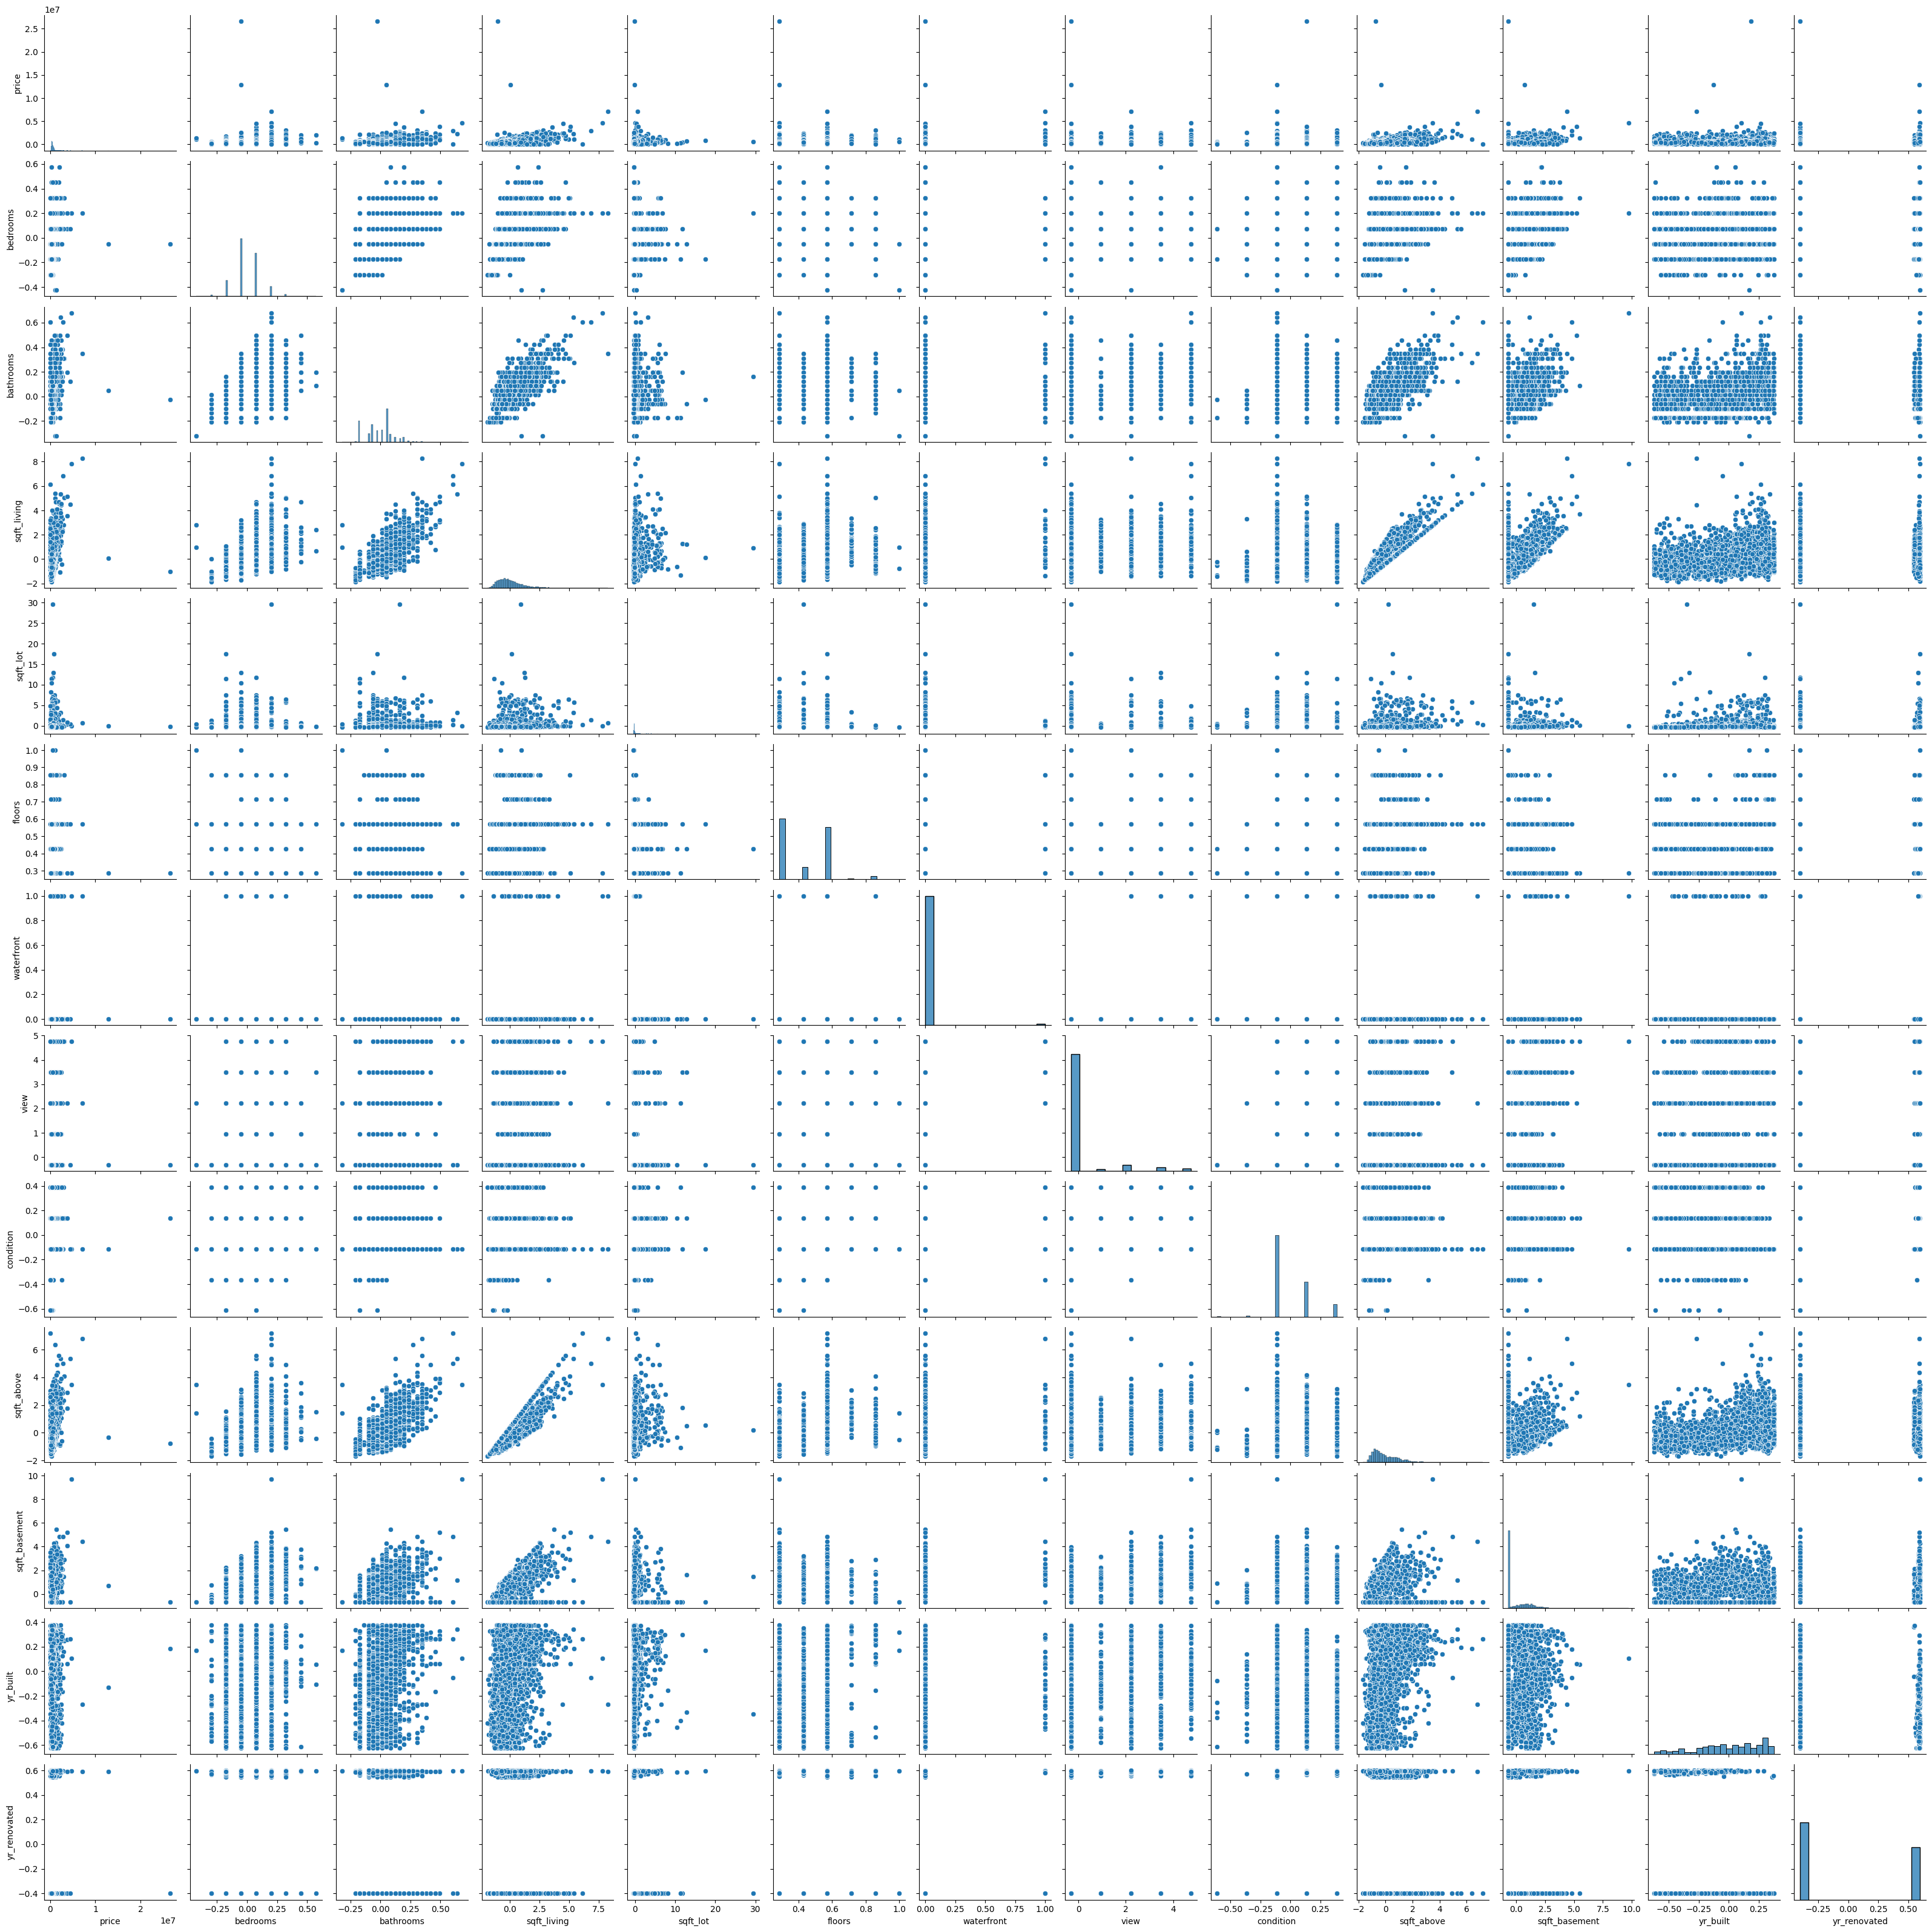

In [143]:
sns.pairplot(df)

<h1>Now that we have visualized, explored, cleaned and scaled our data, its time to apply Linear Regression Model</h1>

In [154]:
x = df.drop('price',axis = 1)
y = df['price']
x = np.array(x)
y = np.array(y)
y= y.reshape(4140,1)
print(x.shape,y.shape)

(4140, 12) (4140, 1)


In [155]:
#Initialize parameters:
w = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])
b = 0

In [156]:
#Cost Function:
cost = []
def cost_function(x,y,w,b):
    y_hat = np.dot(x,w)+b
    f_wb_x = y_hat - y
    m = x.shape[0]
    J_wb = 1/(2*m) * np.sum((f_wb_x**2))
    return J_wb

In [157]:
#Calculating GRadients
def gradient_descent(x,y,w,b,alpha,iterations):
    for i in range(iterations):
        m = x.shape[0]
        y_hat = np.dot(x,w)+b
        f_wb_x = y_hat - y
        dj_dw = 1/m * np.dot(x.T,f_wb_x)
        dj_db = 1/m * np.sum(f_wb_x)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost.append(cost_function(x,y,w,b))
    return w,b

In [158]:
#Test run with our data:
alpha = 0.01
iterations = 1000
w,b = gradient_descent(x,y,w,b,alpha,iterations)
print(w,b)

[[-26449.28851903]
 [  8606.84691837]
 [118300.57434694]
 [-20068.4364566 ]
 [191090.06919242]
 [ 27696.09262925]
 [ 52489.96946331]
 [ 46001.44455889]
 [100162.00760267]
 [ 58130.34493676]
 [-97872.33978792]
 [ 20425.47123854]] 469670.7496564221


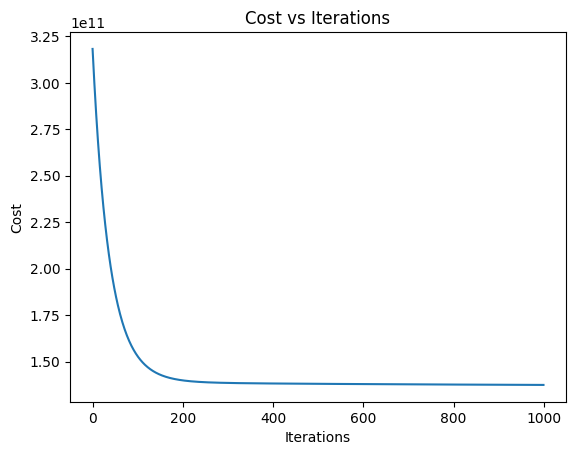

In [159]:
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

In [173]:
x_pred = np.array([[0.19994,0.086957,0.957169,-0.214165,0.285714,0,-0.311968,0.386896,-0.268614,2.471957,0.071807,-0.401375]])

y_pred = np.dot(x_pred,w)+b

print(y_pred)

[[740246.79871513]]


<h4>Lets see how far is our model using Root Mean Squared Error</h4>

In [174]:
rmse = np.sqrt(2 * cost[-1]) # cost[999] Last element of the cost list
print(rmse)

524356.5480560629


<h3>Few things to keep in mind</h3>
<ul>
    <li>RMSE is big, since the price ranges from hundreds to thousands, it indicates our LInear REgression Model is not super accurate </li>
    <li>Linear Regression assumes a linear relationships but house prices have often have non-linear effects</li>
    <li>We could use feature engineering or polynomial features</li>
    <li>From a Linear Regression from scratch perspective, we did everything, RMSE just shows the limits of this simple model</li>
</ul>